<a href="https://colab.research.google.com/github/anilaksu/Algorithmic-Trading-Codes/blob/main/Stock_Markets_Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quantitative Finance & Algorithmic Trading**
## *Spring 2023*  
Anil Aksu    
aaa293@cornell.edu

*February 10th, 2023*  
Version 1.1


# Agenda
- ***Stock Market Basics***
- ***Bonds***
- ***Modern Portfolio Theory (Markowitz-Model)***
- ***Capital Asset Pricing Model (CAPM)***
- ***Random Behaviour in Finance***




# 1 Stock Market Basics

The most important concept in finance is the time value of money. $\$x$ today is worth more than $\$x$ in a year's time. Because we may invest $\$x$ today:
- We may invest it into stocks
- We can lend it to bank for some interest

Therefore, we may get premium due to the interest rate. As a result, we calculate Future Value (FV) as:

$\text{FV}(\$x)= \$x (1+r)^{n}$

where $r$ is the assumed interest rate and $n$ is the number of years. In other words, Future Value is the value of a current asset at a specified date in the future based on an assumed rate of growth over time.



In [ ]:
from math import exp     # Here we import the exponential function from Math Library

def future_discrete_value(x, r, n): # Future Value of X money in n years under r interest rate using discrete model
  return x * (1 + r) ** n

def present_discrete_value(x, r, n): # Present Value of X money in n years under r interest rate using discrete model
  return x * (1 + r) ** -n

def future_continuous_value(x, r, n): # Future Value of X money in n years under r interest rate using continuous model
  return x * exp(r * n)

def present_continuous_value(x, r, n): # Present Value of X money in n years under r interest rate using continuous model
  return x * exp(-r * n)


In [ ]:
if __name__ == '__main__':    # Here we set our initial money interest rate and number of time intervals

  # value of investment in dollars
  x = 100
  # define the interest rate (r)
  r = 0.05
  # duration (years)
  n = 5

  print("Future value (discrete model) of x: %s" % future_discrete_value(x, r, n))
  print("Present value (discrete model) of x: %s" % present_discrete_value(x, r, n))
  print("Future value (continuous model) of x: %s" % future_continuous_value(x, r, n))
  print("Present value (continuous model) of x: %s" % present_continuous_value(x, r, n))


Future value (discrete model) of x: 127.62815625000003
Present value (discrete model) of x: 78.35261664684589
Future value (continuous model) of x: 128.40254166877415
Present value (continuous model) of x: 77.8800783071405


## 2 Bonds
A bond is a **debt investment** in which an investor loans money to an entity (company or government):
-  For a defined period of time
- Variable or fixed interest rate

So when a company needs to raise money to finance new projects they may issue bonds directly to investors instead of obtaining loans from bank. Interest rate of bonds are usually a bit higher than that of the banks.
Finally,there are two types of bonds:
- Zero Coupon Bond
- Coupon Bond

In zero-coupon bonds, the principal amount(par value, face value or nominal value) is paid to the investor after a specified period of time. It is crucial that when dealing with zero-coupon bonds, **no other cash payment** is made. Also, it has the **premium** (interest rate) the bond issuer is willing to pay to the investor for the loan. Finally, the **maturity date** defines the end of the agreement. At this time, the bond issuer redeems the bond by **paying the principal**.
How much would you pay for this bond? We use the present value of the actual principal amount as

$\text{PV}= \frac{\text{Principal Amount}}{(1+r)^T}$

where $r$ is the market interest rate and $T$ is the maturity date. In addition to the present value of the principal amount, we also need to add the total present value of the coupons until the maturity date. Therefore, the prices of bonds are calculated as follows $\text{PV} = c \times \text{Principal Amount} \sum_{i=1}^{T} \frac{1}{(1+r)^{T}} + \frac{\text{Principal Amount} }{(1+r)^{T}}$
where $c$ is the coupon rate.





In [ ]:
# Here we define Zero Coupon Bonds Class
class ZeroCouponBonds:
  def __init__(self, principal, maturity, interest_rate):
    # principal amount
    self.principal = principal
    # date to maturity
    self.maturity = maturity
    # interest rate
    self.interest_rate = interest_rate/100

  def present_value(self, x, n):
      return x / (1+self.interest_rate) ** n

  def calculate_price(self):
      return self.present_value(self.principal, self.maturity)

In [ ]:
# Here we define Coupon Bonds Class
class CouponBonds:
  def __init__(self, principal, rate, maturity, interest_rate):
    # principal amount
    self.principal = principal
    # coupon rate
    self.rate = rate / 100
    # date to maturity
    self.maturity = maturity
    # interest rate
    self.interest_rate = interest_rate / 100

  def present_value(self, x, n):
      return x / (1+self.interest_rate) ** n

  def calculate_price(self):

    price = 0
    # discount the coupon payments
    for t in (1, self.maturity + 1):
      price = price + self.present_value(self.principal * self.rate, t)
    # discount the principle
    price = price + self.present_value(self.principal, self.maturity)
    return price

In [ ]:
# Here we define continuous Coupon Bonds Class
from math import exp     # Here we import the exponential function from Math Library

class ContinuousCouponBonds:
  def __init__(self, principal, rate, maturity, interest_rate):
    # principal amount
    self.principal = principal
    # coupon rate
    self.rate = rate / 100
    # date to maturity
    self.maturity = maturity
    # interest rate
    self.interest_rate = interest_rate / 100

  def present_value(self, x, n):
      return x * exp(-self.interest_rate * n)

  def calculate_price(self):

    price = 0
    # discount the coupon payments
    for t in (1, self.maturity + 1):
      price = price + self.present_value(self.principal * self.rate, t)
    # discount the principle
    price = price + self.present_value(self.principal, self.maturity)
    return price

In [ ]:
# Here we define the main script to call the bond class
if __name__ == '__main__':
  # Here we create a zero coupon bond with $1000 principal, 2 year maturity, and 4% interest rate
  ZCbond = ZeroCouponBonds(1000, 2, 4)           # Zero coupon bond
  Cbond = CouponBonds(1000, 10, 2, 4)            # Coupon bond with 10% coupon payment
  CCbond = ContinuousCouponBonds(1000, 10, 2, 4) # Continuous Coupon bond with 10% coupon payment
  print("Price of the zero coupon bond in dollars: %.2f" % ZCbond.calculate_price())
  print("Price of the coupon bond in dollars: %.2f" % Cbond.calculate_price())
  print("Price of the continuous coupon bond in dollars: %.2f" % Cbond.calculate_price())


Price of the zero coupon bond in dollars: 924.56
Price of the coupon bond in dollars: 1109.61
Price of the continuous coupon bond in dollars: 1109.61


## 3 Modern Portfolio Theory (Markowitz-Model)

he main idea behind the Markowitz model is that if we invest all of our money into a single stock then we take a huge risk because stocks are volatile. As a result, we may combine multiple assets (stocks) in order to reduce risk as much as possible, which is the main conclusion of Markowitz-Model and called diversification. Also, combining assets is the main idea and it is the same approach behind **Black-Scholes model**. Assumptions of the Markowitz-Model can be listed as:
- Returns are normally distributed: the returns of the stocks are **normally distributed** with $\mu$ mean and $\sigma$ standard deviation. (Sometimes, it is not the case)
- Investors are risk-averse: investors will take on more risks if they are expecting more return.

If there is a low risk (bonds) the return is low as well. With higher risk (stocks), the returns are usually higher. Modern portfolio theory states that investors can construct optimal portfolios offering the **maximum possible expected return** for a given **level of risk**. So the efficient portfolio is the portfolio that has the highest reward for a given level of risk or the lowest risk for a given return.

The Markowitz-Model relies heavily on **historical data** - historical mean performance is assumed to be the best estimator for future (expected) performance. Therefore, the expected return of the portfolio can be calculated as:
\begin{equation}
\mu_{\text{portfolio}} = E(\sum_{i}w_i r_i)= \sum_i w_i E(r_i) = \sum_i w_i \mu_i = \mathbf{w}^{T}\mathbf{\mu}.
\end{equation}
However, since it is using historical data, we need to restrict it to the relevant time frame where the market dynamics did not change dramatically.

The **risk of the portfolio** can be measured by the volatility - that can be approximated by the standard deviation or the variance where **negative** covariance means returns **move inversely** and **positive** covariance means that asset returns **move together. Also, Markowitz-Model is about diversification which means we want to reduce risk as much as possible. Possessing assets such as stocks with high positive covariance does not provide much diversification. The aim is to minimize fluctuations in the long term. So we should include uncorrelated stocks in the portfolio instead.

 For calculating the variance of the portfolio, we need the covariance matrix containing all the covariances of the stocks involved in the portfolio. Therefore, the covariance matrix contains the relationship between all the assets in the portfolio as follows:

$
\mathbf{\Sigma} =
\begin{bmatrix}
\sigma_{1}^2 & \sigma_{12} & ... & \sigma_{1n} \\
. & & & . \\
. & & & . \\
. & & & . \\
\sigma_{n1} & & ... & \sigma_{n}^{2}\\
\end{bmatrix}$

As a result, the covariance of the portfolio can be calculated as:
$
\sigma_{\text{portfolio}}^{2} = \sum_{i} \sum_{j}w_i w_j \sigma_{ij} = \mathbf{w}^{T}\mathbf{\Sigma}\mathbf{w}.
$

Investors are interested in:
- the maximum return (mean) given a fixed risk level (so volatility)
- Minimum risk given a fixed return

These portfolios make up the so-called **efficient frontier**, which is the main feature of Markowitz model the investor can decide the risk or the expected return. However, **if you want to make money, you have to take risk!!**

**Sharpe Ratio** is one of the most important **risk and return measures** used in quantitative finance, which describes how much excess return you are receiving for extra volatility that you endure holding a riskier asset (stock). Sharpe ratio is formulated as follows:
$
S(x) = \frac{r_x - R_f}{\sigma(x)}
$
where $R_f$ is rate of return of risk-free security such as treasury bond and $r_x$ is average rate of return of investment $x$. As an interpretation, higher Sharpe ratio indicates a better investment. As a rule of thumb, Sharpe ratio $S(x)>1$ is considered to be a good investment.


In [ ]:
# Here we pull the historical stock price data for the companies we are interested in
!python3 -V
!which pip3
!pip3 install yfinance --upgrade --no-cache-dir
# Let's import relevant libraries
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimization

# on average there are 252 trading days in a year
NUM_TRADING_DAYS = 252
# number of portfolios for sampling with random weights
NUM_PORTFOLIOS = 10000

# stock we are going to handle
stocks = ['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB']

# historical data - define START and END dates
start_date = '2010-01-01'
end_date = '2017-01-01'

def download_data():
  # name of the stock (key) - stock values (2010-2017) as the values
  stock_data = {}
  for stock in stocks:
    ticker = yf.Ticker(stock)
    stock_data[stock] = ticker.history(start= start_date, end = end_date)['Close']

  return pd.DataFrame(stock_data)

Python 3.8.10
/usr/local/bin/pip3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Visualization of the data
def show_data(data):
    data.plot(figsize=(10,5))
    plt.show()

In [ ]:
# Calculation of returns
def calculate_return(data):
    # NORMALIZATION - to measure all variables in comparable metrics
    log_return = np.log(data/data.shift(1))
    return log_return[1:]

In [ ]:
def show_statistics(returns):
    # instead of daily metrics we are after annual metrics
    # Mean of annual return
    print(returns.mean() * NUM_TRADING_DAYS)
    print(returns.cov() * NUM_TRADING_DAYS)


In [ ]:
def show_mean_variance(returns, weights):
    # We are after the annual returns
    portfolio_return = np.sum(returns.mean() * weights) * NUM_TRADING_DAYS
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * NUM_TRADING_DAYS, weights)))
    print("Expected portfolio mean (return): ", portfolio_return)
    print("Expected portfolio volatility (standard deviation): ", portfolio_volatility)

In [ ]:
def generate_portfolios(returns):

    portfolio_means = []
    portfolio_risks = []
    portfolio_weights = []

    for _ in range(NUM_PORTFOLIOS):
      w = np.random.random(len(stocks))
      w /= np.sum(w)
      portfolio_weights.append(w)
      portfolio_means.append(np.sum(returns.mean() * w) * NUM_TRADING_DAYS)
      portfolio_risks.append(np.sqrt(np.dot(w.T, np.dot(returns.cov() * NUM_TRADING_DAYS, w))))

    return np.array(portfolio_weights), np.array(portfolio_means), np.array(portfolio_risks)

In [ ]:
def show_portfolios(returns,volatilities):
    plt.figure(figsize=(10,6))
    plt.scatter(volatilities, returns, c=returns/volatilities, marker = 'o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.show()

In [ ]:
def statistics(weights, returns):
    portfolio_return = np.sum(returns.mean() * weights) * NUM_TRADING_DAYS
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * NUM_TRADING_DAYS, weights)))

    return np.array([portfolio_return, portfolio_volatility
                     , portfolio_return/portfolio_volatility])

In [ ]:
# scipy optimize module can find the minimum of a given function
# the maximum of a f(x) is the minimum of -f(x)
def min_function_sharpe(weights, returns):
    return -statistics(weights, returns)[2]

In [ ]:
def optimize_portfolio(weights, returns):
    # the sum of weights is 1
    constraints = {'type':'eq', 'fun': lambda x: np.sum(x) - 1}
    # the weights can be 1 at most: 1 when 100% of money is invested into a single stock
    bounds = tuple((0,1) for _ in range(len(stocks)))
    return optimization.minimize(fun = min_function_sharpe, x0 = weights[0], args = returns
                          , method = 'SLSQP', bounds =bounds, constraints=constraints)

In [ ]:
def print_optimal_portfolio(optimum, returns):
    print("Optimal portfolio: ", optimum['x'].round(3))
    print("Expected return, volatility and Sharpe ratio: ", statistics(optimum['x'].round(3), returns))

In [ ]:
def show_optimal_portfolio(opt, rets, portfolio_rets, portfolio_vols):
    plt.figure(figsize = (10, 6))
    plt.scatter(portfolio_vols, portfolio_rets, c=portfolio_rets/portfolio_vols, marker = 'o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.plot(statistics(opt['x'], rets)[1], statistics(opt['x'], rets)[0], 'g*', markersize = 20)
    plt.show()

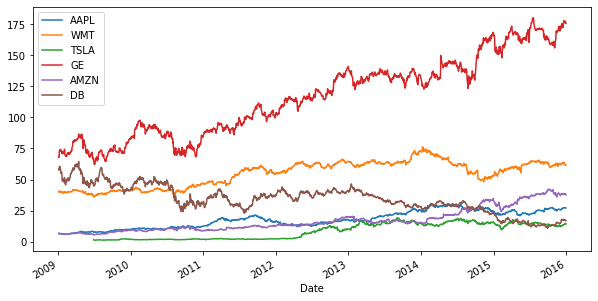

AAPL    0.203962
WMT     0.060359
TSLA    0.336881
GE      0.135330
AMZN    0.246535
DB     -0.174779
dtype: float64
          AAPL       WMT      TSLA        GE      AMZN        DB
AAPL  0.068795  0.009859  0.029641  0.021861  0.027812  0.036297
WMT   0.009859  0.026701  0.010949  0.013018  0.010755  0.020153
TSLA  0.029641  0.010949  0.274985  0.027283  0.047326  0.052331
GE    0.021861  0.013018  0.027283  0.047376  0.025830  0.054800
AMZN  0.027812  0.010755  0.047326  0.025830  0.104095  0.045055
DB    0.036297  0.020153  0.052331  0.054800  0.045055  0.175733


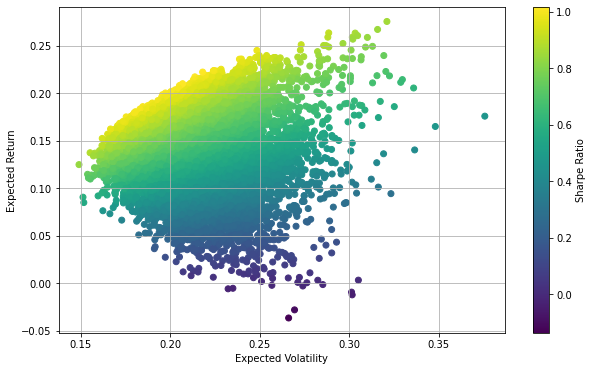

Optimal portfolio:  [0.363 0.076 0.141 0.155 0.264 0.   ]
Expected return, volatility and Sharpe ratio:  [0.21218697 0.20555032 1.03228721]


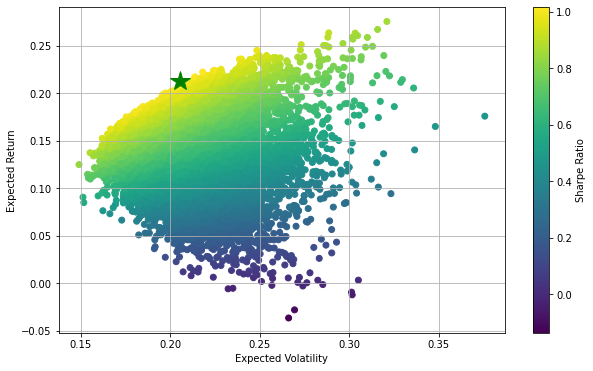

In [ ]:
# Here we write the mainscript to construct our portfolio
if __name__ == '__main__':

    dataset = download_data()
    show_data(dataset)
    log_daily_returns = calculate_return(dataset)
    show_statistics(log_daily_returns)

    pweights, means, risks = generate_portfolios(log_daily_returns)
    show_portfolios(means, risks)
    optimum = optimize_portfolio(pweights, log_daily_returns)
    print_optimal_portfolio(optimum, log_daily_returns)
    show_optimal_portfolio(optimum, log_daily_returns, means, risks)

# 4 Capital Asset Pricing Model (CAPM)

The risks in a portfolio can be divided into the categories below:
- **Unsystematic Risk**: this is the specific to individual stocks, which can be **diversified away** by holding multiple stocks in a portfolio. Unsystematic risk is the component of a stock's return that is not correlated with market moves.
- **Systematic Risk**: this risk can not be diversified away. This is the risk due to interest rate changes such as recessions or wars. The **CAPM** model measures this risk with the $\beta$ parameter.


The Capital Asset Pricing Model (CAPM) was first formulated in early 1960s, which is a linear relationship between any stock expected return and the market premium. Explicitly, the CAPM is formulated as follows:

$E\left[  r_a \right] = r_f + \beta_a (E\left[  r_m \right] - r_f)$

where the investment can be a single stock or a portfolio and $E\left[  r_m \right]$ is the mean market return. In the CAPM model, the market refers to the market defined in **S\&P 500**
    
We can alternatively formulate the relation as:

$E\left[  r_a \right] - r_f = \alpha + \beta_a (E\left[  r_m \right] - r_f)$
Here we have $\alpha$ value to fit the linear regression formulation.Moreover, depending on the sign of $\alpha$, the particular portfolio may be underpriced or overpriced. If $\alpha > 0$, then our portfolio is underpriced. Therefore, it will bring more value than expected. Conversely,  If $\alpha < 0$, then our portfolio is overpriced. Therefore, it will bring less value than expected


In [ ]:
# Here we pull the historical stock price data for the companies we are interested in
!python3 -V
!which pip3
!pip3 install yfinance --upgrade --no-cache-dir
# Here we import relevant libraries
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


RISK_FREE_RATE = 0.05
MONTHS_IN_YEAR = 12

class CAPM:
    def __init__(self, stocks, start_date, end_date):
        self.data = None
        self.stocks = stocks
        self.start_date = start_date
        self.end_date = end_date

    def download_data(self):

        data = {}

        for stock in self.stocks:
          ticker = yf.download(stock, self.start_date, self.end_date)
          data[stock] = ticker['Adj Close']

        return pd.DataFrame(data)
    def initialize(self):

        stock_data = self.download_data()
        # print(stock_data) ## this prints daily data
        # we use monthly returns instead of daily returns
        stock_data = stock_data.resample('M').last() # It returns monthly data so that the returns are approximately normally distributed
        #print(stock_data) ## this prints monthly data
        self.data = pd.DataFrame({'s_adjclose':stock_data[self.stocks[0]],
                                  'm_adjclose': stock_data[self.stocks[1]]})
        # logarithmic monthly returns
        self.data[['s_returns', 'm_returns']] = np.log(self.data[['s_adjclose','m_adjclose']]/self.data[['s_adjclose','m_adjclose']].shift(1))
        # remove NaN values
        self.data = self.data[1:]

        #print(self.data)

    def calculate_beta(self):
        # covariance matrix: the diagonal items are the variances
        # off diagonals are the covariances
        # the matrix is symmetric: cov[0,1] = cov[1,0]
        covariance_matrix = np.cov(self.data["s_returns"], self.data["m_returns"])
        # calculating beta according to the formul
        beta = covariance_matrix[0,1] / covariance_matrix[1,1]
        print("Beta from formula: ", beta)

    def regression(self):
        # using linear regression to fit a line to the data
        # [stock_returns, market_returns] - slope is the beta
        beta, alpha = np.polyfit(self.data['m_returns'], self.data['s_returns'], deg =1 ) # degree states the order of the polynomial
        print("Beta from regression: ", beta)
        # calculate the expected return according to the CAPM formula
        expected_return = RISK_FREE_RATE + beta * (self.data['m_returns'].mean() * MONTHS_IN_YEAR - RISK_FREE_RATE)
        print("Expected return: ", expected_return)
        self.plot_regression(alpha, beta)

    def plot_regression(self, alpha, beta):
        fig, axis = plt.subplots(1, figsize = (20,10))
        axis.scatter(self.data["m_returns"], self.data["s_returns"], label="Data points")
        axis.plot(self.data["m_returns"], beta * self.data["m_returns"] + alpha, color = 'red'
        , label = "CAPM Line")
        plt.title('Capital Asset Pricing Model, finding alphas and betas')
        plt.xlabel('Market return $R_m$', fontsize = 18)
        plt.ylabel('Stock return $R_a$')
        plt.text(0.08, 0.05, r'$R_a = \beta * R_m + \alpha$', fontsize = 18)
        plt.legend()
        plt.grid(True)
        plt.show()

Python 3.8.10
/usr/local/bin/pip3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 112.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 139.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 98.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 146.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing ins

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Beta from formula:  0.7135104384372919
Beta from regression:  0.713510438437292
Expected return:  0.09011316156349657


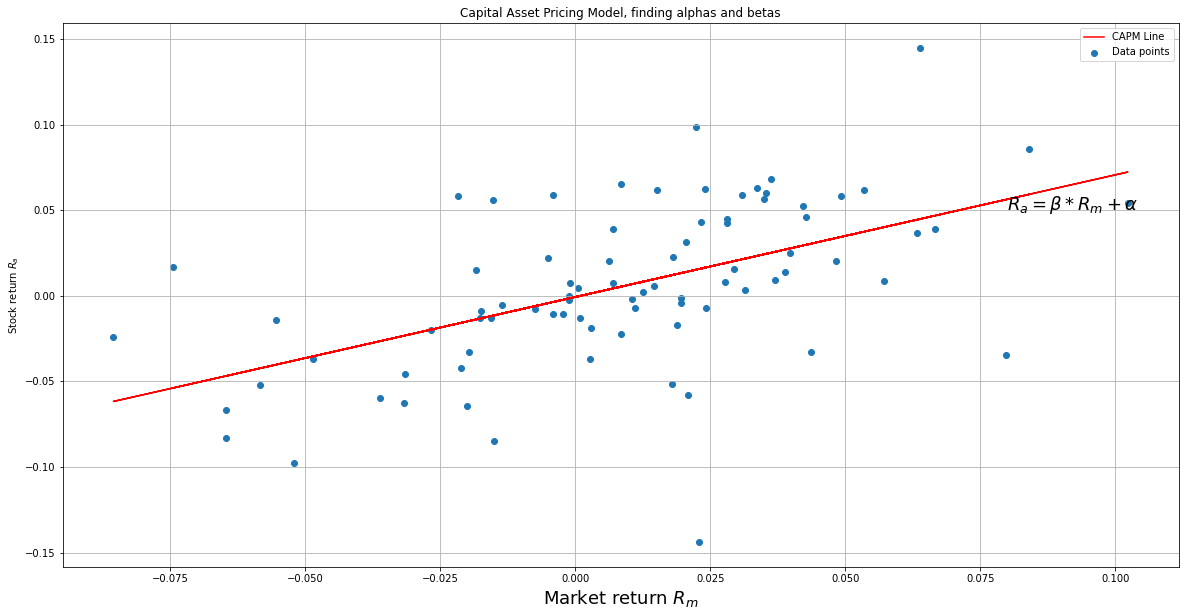

In [ ]:
if __name__ == '__main__':

  capm = CAPM(['IBM','^GSPC'], '2010-01-01', '2017-01-01') # Note that ^GSPC stands for S&P 500 market data
  capm.initialize()
  capm.calculate_beta()
  capm.regression()


# 4 Options

**Call option** is the right to buy a particular asset for an agreed $E$ price at a specified $T$ time in the future. For example, you can buy a call option on IBM. It gives the right to buy one IBM stock for \$30 in 1 month's time. Today's price is \$25. Here $E =\$30$ is the exercise price at $T=$ 1 month. Also, the stock price $S(t)$ is fluctuating and we also need to pay the price of the call option $V(S,t)$. For a call option, we speculate that the stock will rise. Given the structure of the call option, its value at $T$ expiry can be found as $\max(S-E,0)$. Alternatively, if the stock price has decreased in value then we do not buy the underlying stock, otherwise we make a profit of $S-E$.

**Put option** is the right to sell a particular asset (stock) for an agreed $E$ price at a specific $T$ time in the future. For example, you can buy a put option on IBM. It gives the right to sell one IBM stock for \$25 in 1 month's time. Today's price is \$25. Here $E =\$25$ is the exercise price at $T=$ 1 month. Also, the stock price $S(t)$ is fluctuating and we also need to pay the price of the call option $V(S,t)$. For a put option, we speculate that the stock will fall. Given the structure of the call option, its value at $T$ expiry can be found as $\max(E-S,0)$. Alternatively, if the stock price has increased in value then we do not buy the underlying stock, otherwise we make a profit of $E-S$.



In [ ]:
def call_option(K, V):
  # K: Strike Price
  # V:

  # we create N+1 Stock Prices
  S = np.linspace(x0, n, n+1)

  # We have to use cumulative sum: on every step the additional value is
  # drawn from a normal distribution with mean 0 and variance dt .... N(0,dt)
  W[1:n+1] = np.cumsum(np.random.normal(0.5, np.sqrt(100 * dt), n))

  return t, W

# 5 Random Bahaviour in Finance

**Quantitative Analysis** has an assumption: all financial quantities such as $S(t)$ stock prices or $r(t)$ interest rates have **random behaviour**. It tries to model the behaviour of financial assets. We have to use **randomness in our models** so stochastic calculus and stochastic differential equations are needed.

We can observe the randomness by analyzing **daily returns**. The daily return in the $\left[ t-1,t \right]$:

$
R(t) = \frac{S(t)-S(t-1)}{S(t-1)}.
$

As we have seen the daily returns (or monthly returns) have approximately **normal distributions**, which can be defined by two parameters $\mu$ mean and $\sigma^2$ variance. So we can define return as a **random variable** drawn from a normal distribution as:
$
R(t) = \mu + \sigma \times x
$

where $x$ is a constant. Stock price $S(t)$ can be described by a $W(t)$ random walk (so-called Wiener process). $W(t)$ has continuous sample path and has independent and **normally distributed** increments.

The returns of a given stock price is $\mathcal{N}(\mu,\sigma^2)$ normally distributed. However, the normal distribution is not working dine as stock **prices can not have negative values**. More precisely, stock prices follow **log-normal** distribution, which in probability theory is a continuous distribution of a random variable whose **logarithm is normally distributed**. So if the random variable $X$ is log-normally distributed then $Y =\log X$ has a normal distribution.

$W(t)$ has independent increments: future $W(t+\mathrm{d}t) - W(t)$ increments are independent of past values where $W(t)$ has Gaussian increments so that $W(t+\mathrm{d}t) - W(t) \sim \mathcal{N}(0,\mathrm{d}t)$. As a result, the incremental change in the stock price can be modeled as:
$
\underbrace{\mathrm{d}S}_{\text{the change in the stock price}} = \underbrace{\mu S \mathrm{d}t}_{\text{deterministic drift part}} + \underbrace{\sigma S \mathrm{d}W}_{\text{stochastic part with Wiener-process}}
$
where $\mathrm{d}W$ is a random variable drwan from a normal distribution with $\mu=0$ and variance $\mathrm{d}t$. Equation above is a stochastic differential equation and the **fundamental assumption** for most of the modern financial models.

In [ ]:
# Let's first import the relevant libraries
import numpy.random as npr
import numpy as np
import matplotlib.pyplot as plt

def weiner_process(dt = 0.1, x0 = 0, n = 1000):
  # W(t=0) = 0
  # Initialize W(t) with zeros
  W = np.zeros(n+1)

  # we create N+1 timesetps: t = 0,1,2,3, ... N
  t = np.linspace(x0, n, n+1)

  # We have to use cumulative sum: on every step the additional value is
  # drawn from a normal distribution with mean 0 and variance dt .... N(0,dt)
  W[1:n+1] = np.cumsum(np.random.normal(0.5, np.sqrt(100 * dt), n))

  return t, W

def plot_process(t,W):
  plt.plot(t, W)
  plt.xlabel('Time (t)')
  plt.ylabel('Wiener-process W(t)')
  plt.title('Wiener-process')
  plt.show()


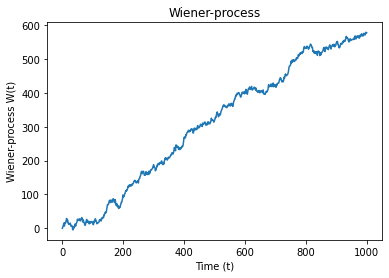

In [ ]:
# The main script to simulate the Weiner Process
if __name__ == '__main__':
  time, data = weiner_process()
  plot_process(time, data)

In [ ]:
# Libraries for geometric brownian motion
import matplotlib.pyplot as plt
import numpy as np

def simulate_geometric_random_walk(S0, T =2, N=1000, mu = 0.1, sigma = 0.05):

  dt = T/N
  t = np.linspace(0, T, N)
  W = np.random.standard_normal(size = N)
  # N(0, dt) = sqrt(dt) * N(0,1)
  W = np.cumsum(W) * np.sqrt(dt)
  X = (mu - 0.5 * sigma ** 2) * t + sigma * W
  S = S0 * np.exp(X)
  return t, S

def plot_simulation(t,S):
  plt.plot(t, S)
  plt.xlabel('Time (t)')
  plt.ylabel('Stock Price S(t)')
  plt.title('Geometric Brownian Motion')
  plt.show()



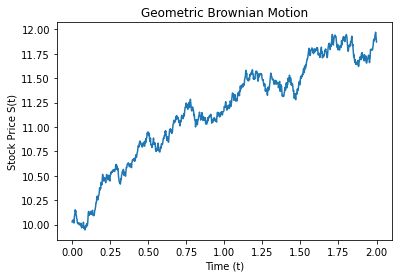

In [ ]:
if __name__ == '__main__':

  time, data = simulate_geometric_random_walk(10)
  plot_simulation(time, data)

# 6 Black-Scholes Model

The Black-Scholes Model constructed by *Fisher Black*, *Robert Merton* and *Myron Scholes* to model range of yields for the option's price $V(S,t)$ when $t<T$ where $T$ denotes the maturity. Then, \textbf{they showed that combining risky assets can eliminate risk itself}. Namely, \underline{Market-neutral strategies} such as \textbf{Delta-Hedging} and \textbf{Pairs-Trading} can eliminate all risk.

The $V(S,t,..)$ value of an option is a function of various parameters
$
V(\underbrace{S,t}_{\text{stock price and time are variables}}, \underbrace{\sigma,\mu}_{\text{volatility and mean are parameters associated with the stock price}}, \underbrace{E, T}_{\text{strike price and expixy are parameters associated with the given option}}, \underbrace{r}_{\text{parameter associated with risk-free rate}})
$

For example, call option will rise on value if the underlying asset rises and fall if the asset falls, because of the greater value of $S(t)$ stock. Conversely, put option will devalue if the underlying asset rises. We can exploit these correlations to end up with a rather special portfolio:

$
\Pi = \underbrace{V(S,t)}_{\text{long position}} - \underbrace{\Delta S}_{\text{Short position}}
$
This special $\Pi$ portfolio contains a long position in the $V(S,t)$ option and a short position in the $S(t)$ underlying stock.

**Dynamic Delta Hedge**

The $\Pi$ portfolio changes from time $t$ to $t+\mathrm{d}t$: first of due to change in the $V(S,t)$ option value and the change in the $S(t)$ underlying asset:
$
\mathrm{d}\Pi = \mathrm{d}V(S,t) - \Delta \mathrm{d}S
$
with the help of Ito's lemma, we can handle these changes.
After expanding the change in the option value, we end up with the following relation:
$
\mathrm{d}\Pi = \frac{\partial V}{\partial t} \mathrm{d} t + \frac{\partial V}{\partial S} \mathrm{d} S + \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 V}{\partial S^2}  \mathrm{d}t - \Delta \mathrm{d}S = \underbrace{(\frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 V}{\partial S^2})}_{\text{deterministic part}}\mathrm{d}t+\underbrace{(\frac{\partial V}{\partial S}-\Delta)}_{\text{stochastic part}}\mathrm{d}S.
$
If we set $\partial V/\partial S = \Delta$, we eliminate the randomness. Therefore, we hedge the risk. Moreover, the derivative of the option with respect to the stock price always changes. So we need to adjust it dynamically.  

Other than the stochastic variable, we need to deal with the deterministic part individually.

**No arbitrage principle**

After eliminating the stochastic risk, we end up with the deterministic part:
$
\mathrm{d}\Pi = \frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 V}{\partial S^2}
$
This change is completely riskless: but risk-free asset has something to do with $r$ risk-free rate. The risk-free $\mathrm{d}\Pi$ must be the same as the growth we would get if we lend the same amount if cast to a bank:
$
\mathrm{d}\Pi = r \Pi \mathrm{d}t
$
Which is called "no arbitrage principle". Why can we make a riskless profit? With arbitrage, an investor can make riskless money!!! We could borrow money from the bank  and pay interest at rate $r$ invest that money into risk-free option/stock portfolio and we could make a profit. Usually, we can assume there are no arbitrage opportunities. After replacing $\Pi$ with $V-\Delta S$ and $\Delta = \partial V/\partial S$, we end up with the \textbf{Black-Scholes} equation:
$
\frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + rS\frac{\partial V}{\partial S} - rV = 0
$

which is a parabolic partial differential equation, so the sum of the solutions is also a solution. Note that financial equations are usually parabolic, they are related to heat and diffusion equations of physics.
Moreover, the solution to Black-Scholes for no dividend yields on the underlying equation can be expressed for \textbf{Call Option} and \textbf{Put Option} respectively as:
$
V_{\text{call}} = S(0)N(d_1)-Ee^{-r(T-t)}N(d_2),
$
$
V_{\text{put}} = -S(0)N(-d_1)+Ee^{-r(T-t)}N(-d_2)
$
where $E$ is the strike price and
$
N(x) = \frac{1}{\sqrt{2 \pi}}\int_{-\infty}{x}e^{-\frac{z^2}{2}}\mathrm{d}z,
$
$
d_1 = \frac{\log(\frac{S(0)}{E})+(r+\frac{1}{2}\sigma^2)(T-t)}{\sigma\sqrt{T-t}},
$
$
d_2 = d_1 - \sigma \sqrt{T-t}.
$

**Greeks**

The delta $\Delta$ of an option/portfolio is the sensitivity of the option/portfolio to the underlying, which can be explicitly given as:
$
\Delta = \frac{\partial V}{\partial S}
$
Also, the delta of a portfolio is the sum of deltas of all individual positions.

Moreover, the gamma $\Gamma$ of an option/portfolio is second derivative of the position with respect to the underlying:
$
\Gamma = \frac{\partial^2 V}{\partial S^2}
$
The gamma is a measure of how often a position must be rehedged in order to maintain a delta-neutral position.
Other Greeks are $\Theta$ is the rate of change of the option price with time:
$
\Theta = \frac{\partial V}{\partial t}
$
and **Vega**, some models rely heavily on the volatility so it may be important to monitor the change according to volatility:
$
\frac{\partial V}{\partial \sigma}.
$
We can reformulate the Black-Scholes model with Greeks as:
\begin{equation}
\Theta + \frac{1}{2}\sigma^2 S^2 \Gamma + rS\Delta - rV = 0.
\end{equation}
You can use Black-Scholes model to find mispriced options in the market, so you can buy or sell accordingly to make a profit.

In [ ]:
from scipy import stats
from numpy import log, exp, sqrt

def call_option_price(S, E, T, rf, sigma):
    # first we have to calculate d1 and d2 parameters
    d1 = (log(S/E) + (rf+sigma*sigma/2.0)*T)/(sigma*sqrt(T))  # Here we use T as T - t
    d2 = d1 - sigma * sqrt(T)
    print("The d1 and d2 parameters: %s, %s" % (d1, d2))
    return S * stats.norm.cdf(d1) - E*exp(-rf*T) * stats.norm.cdf(d2)

def put_option_price(S, E, T, rf, sigma):
    # first we have to calculate d1 and d2 parameters
    d1 = (log(S/E) + (rf+sigma*sigma/2.0)*T)/(sigma*sqrt(T))  # Here we use T as T - t
    d2 = d1 - sigma * sqrt(T)
    print("The d1 and d2 parameters: %s, %s" % (d1, d2))
    return -S * stats.norm.cdf(-d1) + E*exp(-rf*T) * stats.norm.cdf(-d2)



In [ ]:
if __name__ == '__main__':
# Here we calculate both call and put option prices
  S = 100.0      # Stock Price
  E = 100.0      # Strike Price
  T = 1.0        # Maturity
  rf = 0.05      # risk-free rate
  sigma = 0.2    # risk-free rate

  # Call Option and Put Option Prices
  V_call = call_option_price(S, E, T, rf, sigma)
  V_put = put_option_price(S, E, T, rf, sigma)
  print("Put Option Price: %s" % V_call)
  print("Call Option Price: %s" % V_put)


The d1 and d2 parameters: 0.35000000000000003, 0.15000000000000002
The d1 and d2 parameters: 0.35000000000000003, 0.15000000000000002
Put Option Price: 10.450583572185565
Call Option Price: 5.573526022256971


# 6.1 Predicting Stock Prices with Monte-Carlo simulation

If we know $S(0)$ starting point of the stock price and we know $\mu$ and $\sigma$ parameters then we can make multiple simulations. Then, the average of these simulations yields the $S(t)$ price of the stock. Also, note that it is quite cheap to create simulations like these we know how to simulate \textbf{lognormal random walks}.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

NUM__OF_SIMULATIONS = 1000

def stock_monte_carlo(S0, mu, sigma, N=252):

  result = []

  # number of simulations - possible S(t) realizations (of the process)
  for _ in range(NUM__OF_SIMULATIONS):
    prices = [S0]
    for _ in range(N):
      # we simulate the change day by day
      stock_price = prices[-1] * np.exp((mu - 0.5 * sigma ** 2) + sigma * np.random.normal())

      prices.append(stock_price)

    result.append(prices)

  simulation_data = pd.DataFrame(result)
  # the given columns will contain the time series for a given simulation
  simulation_data = simulation_data.T
  simulation_data['mean'] = simulation_data.mean(axis = 1)

  plt.plot(simulation_data['mean'])
  plt.show()


  print('Prediction for future stock price: $%.2f' % simulation_data['mean'][len(simulation_data)-1])

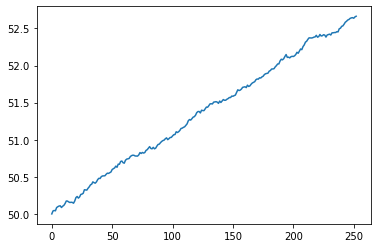

Prediction for future stock price: $52.66


In [ ]:
if __name__ == '__main__':
# Here we calculate both call and put option prices
  S0 = 50.00      # Stock Price
  mu = 0.0002  # Daily Stock Price increase
  sigma = 0.01 # Volatility
  stock_monte_carlo(S0, mu, sigma)

# 6.1 Option Pricing with Monte-Carlo Simulation

For an option, the underlying asset (stock) follows a **geometric random walk**. So, by simulating these stochastic processes we can determine the price of financial instruments. We can obtain the $\log S(t)$ because we know that stock prices can not be negative. So let's use Ito's lemma with $F(S) = \log S(t)$. Therefore,the stock price can be reformulated as:

$
\mathrm{d} \log S(t) = (\mu - \frac{1}{2}\sigma^2)\mathrm{d}t + \sigma \mathrm{d}W
$

After integrating the expression above, we end up with:

$
\log S(t) = \log S(0) +(\mu - \frac{1}{2}\sigma^2)t + \sigma\int_{0}^{t}\mathrm{d}W.
$

Also, Weiner-process is a random walk with mean 0 and variance $t$ so can rewritten as $\mathcal{N}(0,t)$ or $\sqrt{t}\mathcal{N}(0,1)$. If we make a risk-free interest rate, the $\mu$ drift becomes the $r$ risk-free interest rate:

$
S(T) = S(0) e^{\left[ (r-\frac{1}{2}\sigma^2)T+\sigma \sqrt{T}\mathcal{N}(0,1) \right]}
$

In Monte-Carlo simulation, we generate a large amount of stock price estimates with this equation. Also, the option price is the expected value of a pay-off function and we have to use a \textbf{discounted factor} (time value of money)

$
\underbrace{\max(S-E,0)}_{\text{call option}}, \quad \underbrace{\max(E-S,0)}_{\text{put option}}
$

In [ ]:
import numpy as np
# Here we create Option Class to be used for both call and put options
class OptionPricing:

  def __init__(self, S0, E, T, rf, sigma, iterations):
    self.S0 = S0
    self.E = E
    self.T = T
    self.rf = rf
    self.sigma = sigma
    self.iterations = iterations

  def call_option_simulation(self):
    # we have 2 columns: first with 0s the second column will store the payoff
    # we need the first column of 0s: payoff function is max(0,S-E) for call option
    option_data = np.zeros([self.iterations, 2])
    # dimensions: 1 dimensional array with as many items as the iterations
    rand = np.random.normal(0, 1, [1, self.iterations])
    # equation for the S(t) stock price at T
    stock_price = self.S0 * np.exp(self.T * (self.rf - 0.5 * self.sigma **2) + self.sigma * np.sqrt(self.T) * rand)

    # we need S-E becuase we have to calculate the max(S-E,0)
    option_data[:,1] = stock_price - self.E

    # Average for the Monte-Carlo simulation
    # max() returns the max(0,S-E) according to the formula
    average = np.sum(np.amax(option_data, axis = 1))/ float(self.iterations)
    # We have to use the discount factor exp(-rT)
    return np.exp(-1.0 * self.rf * self.T) * average

  def put_option_simulation(self):
    # we have 2 columns: first with 0s the second column will store the payoff
    # we need the first column of 0s: payoff function is max(0,S-E) for call option
    option_data = np.zeros([self.iterations, 2])
    # dimensions: 1 dimensional array with as many items as the iterations
    rand = np.random.normal(0, 1, [1, self.iterations])
    # equation for the S(t) stock price at T
    stock_price = self.S0 * np.exp(self.T * (self.rf - 0.5 * self.sigma **2) + self.sigma * np.sqrt(self.T) * rand)

    # we need S-E becuase we have to calculate the max(S-E,0)
    option_data[:,1] = self.E - stock_price

    # Average for the Monte-Carlo simulation
    # max() returns the max(0,S-E) according to the formula
    average = np.sum(np.amax(option_data, axis = 1))/ float(self.iterations)
    # We have to use the discount factor exp(-rT)
    return np.exp(-1.0 * self.rf * self.T) * average

In [ ]:
if __name__ == '__main__':
  option = OptionPricing(100, 100, 1, 0.05, 0.2, 1000)
  print(' Value of the call option is $%.2f' % option.call_option_simulation())
  print(' Value of the put option is $%.2f' % option.put_option_simulation())

 Value of the call option is $10.58
 Value of the put option is $5.79


# 7 Value at Risk

There is a trade-off between risk and return, which is the conclusion of **Modern Portfolio Theory** and **CAPM**.

- Measuring return is straightforward
- but what about risk?

There are several measures: variance, standard deviation to measure: total risk and beta to measure market risk. These measures do not consider a probability distribution. However, there is another measure with this feature: \textbf{Value at Risk} (VaR). Properties of \textbf{VaR} can be listed as:

- **VaR** measures the amount of potential loss that could happen in an investment (or a portfolio of investments) over a given period of time ( with a given degree of confidence)
- It is easy to understand and interpret unlike standard deviation and beta
- You can compare different types of assets or portfolios with **VaR**. You can compare profitability and risk of different units and make a decision accordingly.

We after something like: on february 10, 2017, we own 100 shares of Apple. THe maximum loss tomorrow is \$1750 with 99\% confidence level. The density of normal distribution plays an important role:

\begin{equation}
f(x) = \frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation}

The density function is closely related to probability - the integral of the function yields the probability as:
\begin{equation}
P(a<x<b) = \int_{a}^{b}f(x) \mathrm{d}x
\end{equation}
We would like to make sure the loss is not going to be greater than a predefined value:
\begin{equation}
P(\delta\Pi \leq -\$5M) = 0.05 = 1 - c
\end{equation}
where $\Pi$ is the value of the portfolio and $c$ is the confidence interval. Moreover, $z$ defines the number of standard deviations form the mean. Explicitly, the \textbf{Value at Risk} can be calculated as follows:
\begin{equation}
\textbf{VaR} = \text{Value} \times (\mu_{\text{n-day}} - z \sigma_{\text{n-day}})
\end{equation}
where $\sigma_{\text{n-day}} = \sigma_{\text{daily}} \sqrt{n}$ and $\mu_{\text{n-day}} = \mu_{\text{daily} n}$. Alternatively, the \textbf{VaR} can be formulated as:

\begin{equation}
\textbf{VaR} = \Delta S \left[  \mu \delta t - \sigma \sqrt{\delta t}\alpha (1-c) \right]
\end{equation}

where $\Delta S$ is the investment today and $\alpha (1-c)$ is the inverse cumulative distribution function for the standardized normal distribution. For tomorrow, we can neglect the drift term $\mu$, but we need to include it for longer terms.

In [ ]:
# Here we pull the historical stock price data for the companies we are interested in
!python3 -V
!which pip3
!pip3 install yfinance --upgrade --no-cache-dir
# Here we import relevant libraries
import numpy as np
import yfinance as yf
from scipy.stats import norm
import pandas as pd
import datetime

def download_data(stock, start_date, end_date):
  data = {}
  ticker = yf.download(stock, start_date, end_date)
  data[stock] = ticker['Adj Close']
  return pd.DataFrame(data)

# this calculates the VaR tomorrow (n=1)
def calculate_var(position, c, mu, sigma):
  var = position * (mu - sigma * norm.ppf(1-c))
  return var

# this calculates the VaR for any days in the future
def calculate_var_n(position, c, mu, sigma, n):
  var = position * (mu * n - sigma * norm.ppf(1-c) * np.sqrt(n))
  return var

Python 3.9.16
/usr/local/bin/pip3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
if __name__ == '__main__':

  start = datetime.datetime(2014, 1, 1)
  end = datetime.datetime(2018, 1, 1)
  stock_data = download_data('C',start, end)

  stock_data['C Return'] = np.log(stock_data['C']/ stock_data['C'].shift(1)) # We add return for Citi with ticker 'C'
  stock_data = stock_data[1:]   # Here we remove the first line as it does not have a return value

  print(stock_data)
  # this is the investment (stocks or whatever)
  S = 1e6
  # Confidence level - this time it is 95%
  c = 0.95
  # Number of days
  n = 100

  # we assume that daily returns are normally distributed
  mu = np.mean(stock_data['C Return'])
  sigma = np.std(stock_data['C Return'])

  print(' Drift and Volatility are  %.4f and %.2f' % (mu,sigma))
  print(' Value at Risk for tomorrow is $%.2f' % calculate_var(S, c, mu, sigma))
  print(' Value at Risk in ' + str(n) + ' day' + ' is $%.2f' % calculate_var_n(S, c, mu, sigma, n))

[*********************100%***********************]  1 of 1 completed
                    C  C Return
Date                           
2014-01-03  43.887184  0.021388
2014-01-06  44.224144  0.007649
2014-01-07  44.528225  0.006852
2014-01-08  45.046005  0.011561
2014-01-09  45.366524  0.007090
...               ...       ...
2017-12-22  63.763916 -0.004362
2017-12-26  63.164196 -0.009450
2017-12-27  63.257126  0.001470
2017-12-28  63.417603  0.002534
2017-12-29  62.851696 -0.008964

[1006 rows x 2 columns]
 Drift and Volatility are  0.0004 and 0.02
 Value at Risk for tomorrow is $25396.71
 Value at Risk in 100 day is $288011.81


# 7.1 Value at Risk with Monte Carlo Simulation

As we know, the stock prices follow a geometric Brownian motion, resulting in:
\begin{equation}
\log S(t) = \log S(0) + (\mu -\frac{1}{2}\sigma^2)t + \sigma\int_{0}^{t}\mathrm{d}W
\end{equation}
with Wiener-process is a random walk with mean 0 and variance $t$ so can be rewritten as $\mathcal{N}(0,t)$ or $\sqrt{t}\mathcal{N}(0,1)$. So the solution yields to:
\begin{equation}
S(t) = S(0)e^{\left[  (\mu -\frac{1}{2}\sigma^2)t + \sigma \sqrt{t}\mathcal{N}(0,1) \right]}
\end{equation}
In Monte-Carlo simulation, we generate a large amount of stock price estimates with this equation. We have to sort the stock prices from the smallest to the largest. If we need the \textbf{VaR} with 99\% confidence level, we need 1\% lowest percentile $S'(t)$ in this series. As a result, we can calculate Value at Risk for 99\% as follows:
\begin{equation}
\textbf{VaR}_{99\%} = S(0) - S'(t).
\end{equation}

In [ ]:
# Here we pull the historical stock price data for the companies we are interested in
!python3 -V
!which pip3
!pip3 install yfinance --upgrade --no-cache-dir
# Here we import relevant libraries
import numpy as np
import yfinance as yf
from scipy.stats import norm
import pandas as pd
import datetime

def download_data(stock, start_date, end_date):
  data = {}
  ticker = yf.download(stock, start_date, end_date)
  data['Adj Close'] = ticker['Adj Close']
  return pd.DataFrame(data)

class ValueAtRiskMonteCarlo:

  def __init__(self, S, mu, sigma, c, n, iterations):

    self.S = S  # our initial investment
    self.mu = mu
    self.sigma = sigma
    self.c = c
    self.n = n # n corresponds to number of days
    self.iterations = iterations

  def simulation(self):
    rand = np.random.normal(0,1, [1, self.iterations])

    # equation for the S(t) stock price
    # the random walk of our initial investment
    stock_price = self.S * (self.n * (self.mu - 0.5 * self.sigma **2) + self.sigma * np.sqrt(self.n) * rand)

    # we have to sort the stock prices to determine the percentile
    stock_price = np.sort(stock_price)

    # it depends on the confidence level: 95% -> 5 and 99% -> 1
    percentile = np.percentile(stock_price, (1-self.c) * 100)

    return self.S - percentile


Python 3.9.16
/usr/local/bin/pip3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
if __name__ == '__main__':

  S = 1e6 # this is the investment (stocks or whatever)
  c = 0.99 # confidence level: this time it is 99%
  n = 1 # 1 data
  iterations = 100000 # number of paths in the Monte-Carlo simulation

  # historical data to approximate mean and standard deviation
  start_date = datetime.datetime(2014, 1, 1)
  end_date = datetime.datetime(2017, 10, 15)

  # download stock related data from Yahoo Finance
  citi = download_data('C', start_date, end_date)

  # we can use percent change to calculate daily returns
  citi['returns'] = citi['Adj Close'].pct_change()
  # We can assume daily returns to be normally distributed: mean and variance
  mu = np.mean(citi['returns'])
  sigma = np.std(citi['returns'])

  model = ValueAtRiskMonteCarlo(S, mu, sigma, c, n, 10)
  model.simulation()

  print(' Value at Risk in ' + str(n) + ' day' + ' is $%.2f' % calculate_var_n(S, c, mu, sigma, n))

[*********************100%***********************]  1 of 1 completed
 Value at Risk in 1 day is $36382.85


# 8 Interest Rate Modeling

**Ornstein-Uhlenbeck** process relies on Weiner process where $W(t)$ has independent increments: future $W(t+\mathrm{d}t)-W(t)$ increments are independent of past values and normally distributed with mean 0 and variance $\mathrm{d}t$. Therefore, $W(t+\mathrm{d}t)-W(t) \sim \mathcal{N}(0,\mathrm{d}t)$. By Ornstein-Uhlenbeck process, the time series $x_t$ can be modeled as:

\begin{equation}
\mathrm{d}x_t = \theta(\mu-x_t)\mathrm{d}t + \sigma\mathrm{d}W_t
\end{equation}

where $\theta$ is the rate by which the process reverts towards the mean and $\mu$ is the equilibrium. This process forms the basis of the model for interest rates (such as the **Vasicek Model**) or currency exchange rates. Also, one application of this process is **pairs trading strategy**, which is based on the **mean reversion**. We open long or short positions when the given $x(t)$ time series is faraway from the mean under the expectation that $x(t)$ will revert towards the mean. **Traders assume the companies would return to their historical balance point.**


This is a simple short-rate $r(t)$ model for bonds, mortgages and credit derivatives are quite sensitive to $r(t)$ interest rate changes. Actually, interest rate modeling is considered to a complex topic, affected by a several factors - political decisions, government intervention and economic states. Similar to Ornstein-Uhlenbeck process , the **Vasicek model** assumes the the $r(t)$ interest rates follows a mean-reverting Ornstein-Uhlenbeck process as:
\begin{equation}
\mathrm{d}r(t) = \kappa(\theta-r(t))\mathrm{d}t + \sigma\mathrm{d}W_t
\end{equation}
where $\kappa$ is the speed of the mean reversion and $r(t)$ interest rate fluctuates around $\theta$. However, this model allows interest rates to be negative, which should not be the case.

In [ ]:
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt
# Ornstein-Uhlenbeck process
def generate_process(dt = 0.1, theta = 1.2, mu=0.5, sigma=0.3, n = 10000):
  # x(t=0)=0 and initialize x(t) with zeros
  x = np.zeros(n)

  for t in range(1,n):
    x[t] = x[t-1] + theta * (mu - x[t-1]) *dt + sigma * normal(0,np.sqrt(dt))
  return x

def plot_process(x):
  plt.plot(x)
  plt.xlabel('t')
  plt.ylabel('x(t)')
  plt.title('Ornstein-Uhlenbeck Process')
  plt.show()

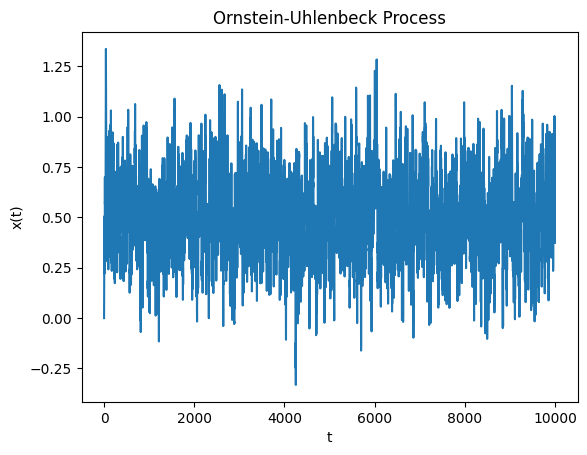

In [ ]:
if __name__ == '__main__':
  data = generate_process()
  plot_process(data)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Vasicek Model
def vasicek_model(r0, kappa, theta, sigma, T=1., N =1000):
  dt = T/float(N)
  t = np.linspace(0, T, N+1)
  rates = [r0]

  for _ in range(N):
    dr = kappa * (theta - rates[-1]) * dt + sigma * np.random.normal(0,np.sqrt(dt))
    rates.append(rates[-1]+dr)

  return t, rates

def plot_model(t, r):
  plt.plot(t, r)
  plt.xlabel('t')
  plt.ylabel('r(t)')
  plt.title('Vasicek Model')
  plt.show()

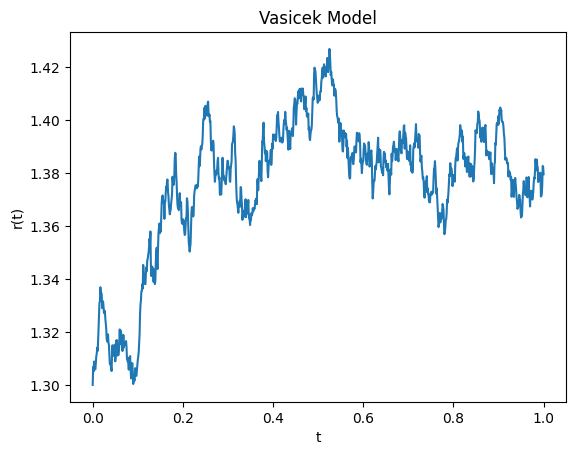

In [ ]:
if __name__ == '__main__':
  time, data = vasicek_model(1.3, 1, 1.5, 0.1)
  plot_model(time, data)

# 8.1 Pricing Bonds with Vasicek Model

As we covered in zero coupon bonds, the continuous time value of money can be describe by the following differential equation:
\begin{equation}
\frac{\mathrm{d}x}{\mathrm{d}t} = r x(t)
\end{equation}
 when $r$ is constant, $x(t) = x(0) e^{rt}$. Therefore, the principal value now is $x(0) = x(t)e^{-rt} $. Going forward, we assume that $r(t)$ interest rate is not constant, but it follows a stochastic process describe by Vasicek model. Therefore, the present value can be calculated as:
 \begin{equation}
 P = x(T) e^{-\int_t^T r(s) \mathrm{d}s}
 \end{equation}
We have to calculate the discounted value of a future cashflow and handle the stochastic interest rate $r(t)$. We can solve this equation using \textbf{Monte-Carlo} simulation. Therefore, we generate a huge number of possible $r(t)$ interest processes. **Then, the mean of these simulations yields the $r_b(t)$ interest rate with the highest probability in the future.** Then, we can use this expected interest rate to calculate the price of the bond.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# We will simulate 1000 interest rate processes
NUM_OF_SIMULATIONS = 1000
# these are the number of points in a single r(t) process
NUM_OF_POINTS =200

def monte_carlo_simulation(x, r0, kappa, theta, sigma, T=1.):

  dt = T/float(NUM_OF_POINTS)
  result = []

  for _ in range(NUM_OF_SIMULATIONS):
    rates = [r0]
    for _ in range(NUM_OF_POINTS):
      dr = kappa * (theta - rates[-1]) * dt + sigma * np.sqrt(dt) * np.random.normal()
      rates.append(rates[-1] + dr)

    result.append(rates)

  simulation_data = pd.DataFrame(result)
  simulation_data = simulation_data.T

  # calculate the integral of the r(t) based on the simulated paths
  integral_sum = simulation_data.sum() * dt
  # present value of a future cash flow
  present_integral_sum = np.exp(-integral_sum)
  # mean because the integral is the average
  bond_price = x * np.mean(present_integral_sum)

  print('Bond price based on Monte-Carlo simulation: $%.2f' % bond_price)

In [ ]:
if __name__ == '__main__':
  monte_carlo_simulation(1000, 0.1, 0.3, 0.9, 0.03)
  #plot_model(time, data)

Bond price based on Monte-Carlo simulation: $810.12
